In [1]:
import matplotlib.pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]=""

import numpy as np
import itertools
from glob import glob

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import pickle 

In [2]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

#### Import model, training function 

In [3]:
from annsa.model_classes import (DNN,
                                 CNN1D)

from annsa.load_pretrained_network import load_trained_model

from annsa import read_spectrum

from annsa.template_sampling import rebin_spectrum

from annsa.results_plotting_functions import *

# Load all models into dictionaries

In [4]:
all_models = {}
all_models_dataaug = {}

### Binarize labels, do this better

In [5]:
dataset = np.load('../dataset_generation/testing_dataset_full_200keV_100.npy')

mlb = LabelBinarizer()
keys = dataset.item()['keys']
mlb.fit(keys)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

### Load networks trained with data augmentation

In [6]:
all_models_dataaug = {}

for path in glob('../final_training_notebooks/final-models/learningcurve-*-dataaug-final_checkpoint*[0-9].i*'):

    model_id = path.split('learningcurve-')[1].split('_checkpoint')[0]
    model_index = path.split('checkpoint-')[1][0]
    model_id_complete = model_id+'-'+model_index
    print(model_id_complete)
    
    if 'c' in model_id:
        model_class = CNN1D
    else:
        model_class = DNN
    features_file_path = '../final_training_notebooks/final-models/learningcurve-'+model_id+'-features'
    weights_file_path = '../final_training_notebooks/final-models/learningcurve-'+model_id+'_checkpoint-'+model_index
    
    trained_model, _ = load_trained_model(model_class,
                                          features_file_path,
                                          weights_file_path,
                                          )

    all_models_dataaug[model_id_complete] = trained_model

cnn-easy-dataaug-final-4
dae-full-dataaug-final-4
dnn-easy-dataaug-final-3
cnn-full-dataaug-final-1
cae-easy-dataaug-final-2
dnn-full-dataaug-final-0
cae-easy-dataaug-final-1
cae-full-dataaug-final-2
cae-easy-dataaug-final-0
cae-easy-dataaug-final-3
dae-easy-dataaug-final-4
cae-full-dataaug-final-0
dnn-easy-dataaug-final-1
cnn-easy-dataaug-final-0
cnn-easy-dataaug-final-2
dae-easy-dataaug-final-0
dae-easy-dataaug-final-2
dae-full-dataaug-final-3
dnn-easy-dataaug-final-0
dae-full-dataaug-final-2
cae-full-dataaug-final-3
cae-full-dataaug-final-1
dnn-full-dataaug-final-1
cae-easy-dataaug-final-4
cnn-easy-dataaug-final-3
dnn-easy-dataaug-final-2
cae-full-dataaug-final-4
dae-easy-dataaug-final-1
dae-easy-dataaug-final-3
dae-full-dataaug-final-1
cnn-full-dataaug-final-0
dae-full-dataaug-final-0
cnn-easy-dataaug-final-1
dnn-easy-dataaug-final-4


### Load networks trained with fixed-size datasets

In [7]:
trainsize = 10000
file_path = '../final_training_notebooks/final-models/learningcurve-'

for path in glob(file_path+'*final*'+'_trainsize_'+str(trainsize)+'_*.index'):
    if 'stop' in path:
        continue
    model_id = path.split('learningcurve-')[1].split('_trainsize')[0]
    model_index = path.split('checkpoint_')[1][0]
    model_id_complete = model_id+'-'+model_index
    print(model_id_complete)
    
    if 'c' in model_id:
        model_class = CNN1D
    else:
        model_class = DNN
    features_file_path = '../final_training_notebooks/final-models/learningcurve-'+model_id+'-features'
    weights_file_path = '../final_training_notebooks/final-models/learningcurve-'+model_id+'_trainsize_'+str(trainsize)+'_checkpoint_'+model_index
    
    trained_model, _ = load_trained_model(model_class,
                                          features_file_path,
                                          weights_file_path,
                                          )
    all_models[model_id_complete] = trained_model
    
all_models.pop('cae-easy-final-5')
all_models.pop('cae-easy-final-6')

dae-easy-final-1
dnn-full-final-1
dae-easy-final-0
cae-easy-final-1
cae-easy-final-4
dae-easy-final-2
dnn-easy-final-4
dnn-easy-final-0
cnn-easy-final-0
cae-easy-final-0
cae-full-final-0
cae-full-final-2
cnn-easy-final-2
cae-full-final-3
dae-easy-final-4
cae-full-final-1
cae-easy-final-2
dae-full-final-4
cnn-full-final-2
cnn-easy-final-3
dae-full-final-0
cae-full-final-4
dnn-easy-final-2
cae-easy-final-3
cae-easy-final-5
cnn-full-final-0
dnn-full-final-4
dnn-easy-final-3
dnn-full-final-0
dnn-full-final-2
cnn-easy-final-1
dnn-easy-final-1
cae-easy-final-6
dae-full-final-2
cnn-easy-final-4
dnn-full-final-3
cnn-full-final-1
dae-full-final-1
dae-full-final-3
dae-easy-final-3


In [8]:
all_models

{'dae-easy-final-1': <annsa.model_classes.DNN at 0x7f42a809c9e8>,
 'dnn-full-final-1': <annsa.model_classes.DNN at 0x7f42a806de80>,
 'dae-easy-final-0': <annsa.model_classes.DNN at 0x7f42a809cc18>,
 'cae-easy-final-1': <annsa.model_classes.CNN1D at 0x7f42a80a55c0>,
 'cae-easy-final-4': <annsa.model_classes.CNN1D at 0x7f42a80a8f60>,
 'dae-easy-final-2': <annsa.model_classes.DNN at 0x7f42a07cd0f0>,
 'dnn-easy-final-4': <annsa.model_classes.DNN at 0x7f42a07e2cc0>,
 'dnn-easy-final-0': <annsa.model_classes.DNN at 0x7f42a07e2208>,
 'cnn-easy-final-0': <annsa.model_classes.CNN1D at 0x7f42a07e3780>,
 'cae-easy-final-0': <annsa.model_classes.CNN1D at 0x7f42a07e20f0>,
 'cae-full-final-0': <annsa.model_classes.CNN1D at 0x7f42a803a470>,
 'cae-full-final-2': <annsa.model_classes.CNN1D at 0x7f42a07f8ac8>,
 'cnn-easy-final-2': <annsa.model_classes.CNN1D at 0x7f42a0779b70>,
 'cae-full-final-3': <annsa.model_classes.CNN1D at 0x7f42a0784b38>,
 'dae-easy-final-4': <annsa.model_classes.DNN at 0x7f42a079a

In [9]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def results2(res, number_isotopes_displayed):

    index = [i[0] for i in sorted(enumerate(res), key=lambda x:x[1])]
    index = list(reversed(index))
    for i in range(number_isotopes_displayed):
        print((mlb.classes_[index[i]], round(res[index[i]], 3)))
        
        
def models_bagged_probs(all_models, model_id, spectra):
    '''
    Bags a specific model's output from a dictionary of models.

    Inputs
        all_models : dict
            Dictionary containing all models
        model_id : string
            Specific model identifier such as 'dnn-full' or 'cae-easy'.
        spectra : numpy array
            Array containing multiple gamma-ray spectra

    Outputs
        output_mode : int
            The most frequent occuring output from the bagged model.
        output : list, int
            A list of outputs from each bagged model.
    '''
    output = []
    for model in all_models:

        if model_id in model:
            tmp_model = all_models[model]
            tmp_output = 100*softmax(tmp_model.forward_pass(spectra, training=False).numpy().flatten())
            output.append(tmp_output)

    output_mode = np.average(output, axis=0)

    return output_mode, output

In [10]:
def predictions_from_bagged_model(all_models,
                                  model_id,
                                  spectra,
                                  classes,
                                  num_isotopes=5,
                                  ):
    
    bagged_probs, _ = models_bagged_probs(all_models, model_id, spectra)
    output_probs_classes = [(x, y) for x, y in zip(bagged_probs, classes)]
    output_probs_classes_sorted = sorted(output_probs_classes, reverse=True)
    
    for i in range(num_isotopes):
        print('%.1f' % output_probs_classes_sorted[i][0],
              output_probs_classes_sorted[i][1])
    print('\n')
    

In [11]:
def shielding_predictions(dataframe_data,
                          isotope,
                          shielding_material,
                          shielding_amounts,
                          shielding_strings,
                          spectra_path,
                          spectra_date,):

    for shielding_index, shielding_amount in enumerate(shielding_amounts):
        print(shielding_strings[shielding_index], end='\r')
        spectra = []
        for path in glob('../training_testing_data/'+spectra_date+'/'+isotope+'/'+spectra_path+isotope+shielding_amount+'*.Spe'):
            spectra.append(read_spectrum(path))
        spectra_cumsum = np.cumsum(spectra, axis=0)

#         for model_id in ['cnn-full-dataaug', 'dnn-full-dataaug', 'dae-full-dataaug', 'cae-full-dataaug', 'cnn-easy-dataaug', 'dnn-easy-dataaug', 'dae-easy-dataaug', 'cae-easy-dataaug']:
        for model_id in ['cnn-full', 'dnn-full', 'dae-full', 'cae-full', 'cnn-easy', 'dnn-easy', 'dae-easy', 'cae-easy']:
            all_output_probs = []

            for i in range(30):
                bagged_output, all_outputs = models_bagged(all_models_dataaug, model_id, [spectra_cumsum[i]])
                bagged_probs, _ = models_bagged_probs(all_models_dataaug, model_id, [spectra_cumsum[i]])
                all_output_probs.append(bagged_probs)

            dataframe_data.append([model_id,
                                   shielding_material,
                                   shielding_strings[shielding_index],
                                   isotope,
                                   spectra_cumsum,
                                   all_output_probs])
        
    return dataframe_data

# Create results dataframe 

In [12]:
dataframe_data = []

## Ba133

In [13]:
isotope = 'ba133'

In [14]:
shielding_material = 'none'
shielding_amounts = ['_none_10sbr_']
shielding_strings = ['none']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [15]:
shielding_material = 'aluminum'
shielding_amounts = ['_al30_10sbr_22cm_',
                     '_al30_10sbr_18-2cm_',
                     '_al60_10sbr_14-8cm_']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [16]:
shielding_material = 'iron'
shielding_amounts = ['_fe60_10sbr_17cm_']
shielding_strings = ['medium']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

## Eu152

In [17]:
isotope = 'eu152'

In [18]:
shielding_material = 'none'
shielding_amounts = ['*none*']
shielding_strings = ['none']
spectra_path = 'detector131_770v_10s_'
spectra_date = '06-20-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [19]:
shielding_material = 'aluminum'
shielding_amounts = ['*_al20*', '*_al40*', '*_al60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [20]:
shielding_material = 'iron'
shielding_amounts = ['*_fe1*', '*_fe2*', '*_fe3*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [21]:
shielding_material = 'lead'
shielding_amounts = ['*_pb1*', '*_pb2*', '*_pb3*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

## Co60

In [22]:
isotope = 'co60'

In [23]:
shielding_material = 'none'
shielding_amounts = ['*none*']
shielding_strings = ['none']
spectra_path = 'detector131_770v_10s_'
spectra_date = '06-20-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [24]:
shielding_material = 'aluminum'
shielding_amounts = ['*_al20*']
shielding_strings = ['light']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [25]:
shielding_material = 'iron'
shielding_amounts = ['*_fe20*', '*_fe40*', '*_fe60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [26]:
shielding_material = 'lead'
shielding_amounts = ['*_pb20*',
                     '*_pb40*',
                     '*_pb60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

## Cs137

In [27]:
isotope = 'cs137'

In [28]:
shielding_material = 'none'
shielding_amounts = ['*none*']
shielding_strings = ['none']
spectra_path = 'detector131_770v_10s_'
spectra_date = '06-20-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [29]:
shielding_material = 'aluminum'
shielding_amounts = ['*_al20*', '*_al40*']
shielding_strings = ['light', 'medium']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [30]:
shielding_material = 'iron'
shielding_amounts = ['*_fe20*', '*_fe40*', '*_fe60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

In [31]:
shielding_material = 'lead'
shielding_amounts = ['*_pb75*']
shielding_strings = ['heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

### Save data in dataframe

In [32]:
columns = ['model_id', 'shielding_material', 'shielding_strings', 'isotope', 'all_spectra', 'posterior_prob']
# columns = ['model_id', 'shielding_material', 'shielding_strings', 'isotope', 'posterior_prob']

results_dataframe = pd.DataFrame(dataframe_data, columns=columns)

# results_dataframe.to_pickle('measured_sources_shielding_performance_dataaug')

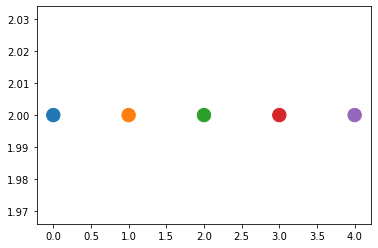

In [33]:
import matplotlib.colors

def categorical_cmap(nc, nsc, cmap="tab10", continuous=False):
    if nc > plt.get_cmap(cmap).N:
        raise ValueError("Too many categories for colormap.")
    if continuous:
        ccolors = plt.get_cmap(cmap)(np.linspace(0,1,nc))
    else:
        ccolors = plt.get_cmap(cmap)(np.arange(nc, dtype=int))
    cols = np.zeros((nc*nsc, 3))
    for i, c in enumerate(ccolors):
        chsv = matplotlib.colors.rgb_to_hsv(c[:3])
        arhsv = np.tile(chsv,nsc).reshape(nsc,3)
        arhsv[:,1] = np.linspace(chsv[1],0.25,nsc)
        arhsv[:,2] = np.linspace(chsv[2],1,nsc)
        rgb = matplotlib.colors.hsv_to_rgb(arhsv)
        cols[i*nsc:(i+1)*nsc,:] = rgb       
    cmap = matplotlib.colors.ListedColormap(cols)
    return cmap

c1 = categorical_cmap(5,1, cmap="tab10")
plt.scatter(np.arange(5*1),np.ones(5*1)+1, c=np.arange(5*1), s=180, cmap=c1)


In [34]:
linestyles = ['-', '--', '-.', ':']

In [35]:
def plot_measured_source_shielded_results(results_dataframe,
                                          isotope,
                                          gadras_isotope,
                                          shielding_material,
                                          shielding_strings,
                                          setting,):

    plt.rcParams.update({'font.size': 20})
    gadras_index = np.argwhere(mlb.classes_ == gadras_isotope).flatten()[0]
    plt.figure(figsize=(10,5))
    for option_index, shielding_string in enumerate(shielding_strings):
        for model_idindex, model_id in enumerate(['cae-'+setting,
                                                  'dae-'+setting,
                                                  'dnn-'+setting,
                                                  'cnn-'+setting,]):
            results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == model_id]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]

            plt.plot(np.linspace(10,300,30),
                     np.array(results_dataframe_tmp['posterior_prob'].values[0]).reshape(30,30)[:,gadras_index],
                     linewidth=2.5,
                     linestyle=linestyles[option_index],
                     color=c1.colors[model_idindex],)
    plt.xlabel('Integration Time (seconds)')
    plt.ylabel('Posterior Probability')
    plt.ylim([0,110])

In [36]:
save_fig = False

## Eu152

(0, 550)

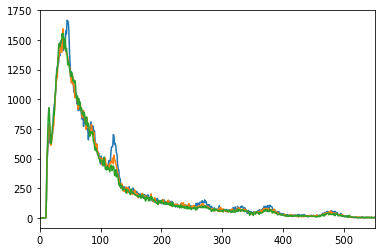

In [37]:
setting = 'easy'
isotope = 'eu152'
shielding_material = 'iron'


for shielding_string in ['light', 'medium', 'heavy']:
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][-1])
# plt.semilogy()
plt.xlim(0,550)
# plt.ylim(1e1,5e3)

### easy

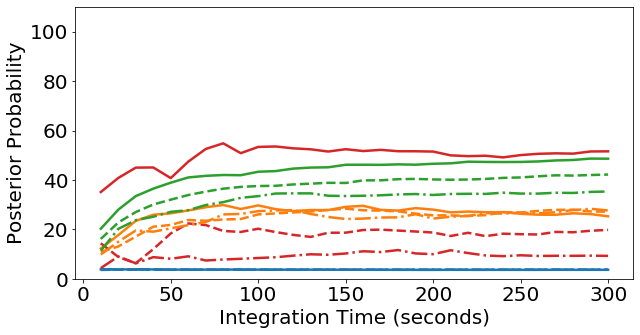

In [38]:
setting = 'easy'
isotope = 'eu152'
gadras_isotope = '152EU'

for shielding_material in ['iron']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)

### full

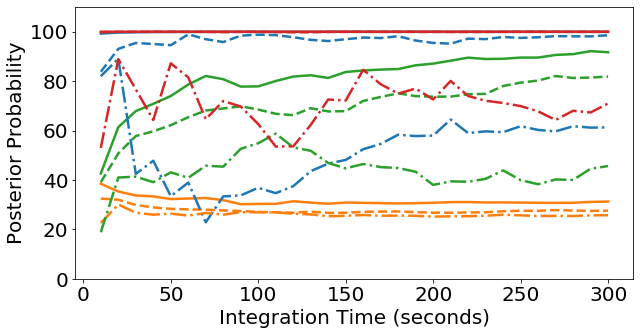

In [39]:
setting = 'full'
isotope = 'eu152'
gadras_isotope = '152EU'

for shielding_material in ['iron']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)

## Ba133

### easy

(0, 250)

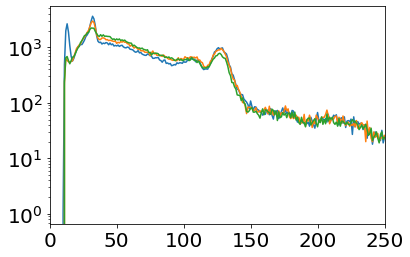

In [40]:
setting = 'easy'
isotope = 'ba133'
gadras_isotope = '133BA'
shielding_material = 'aluminum'


for shielding_string in ['light', 'medium', 'heavy']:
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][-1])
plt.semilogy()
plt.xlim(0,250)
# plt.ylim(1e1,5e3)

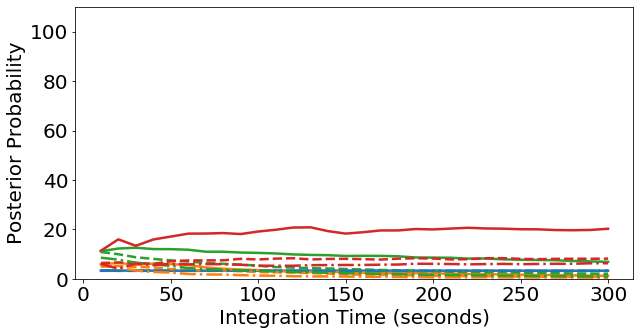

In [41]:
setting = 'easy'
isotope = 'ba133'
gadras_isotope = '133BA'

for shielding_material in ['aluminum']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)

### full

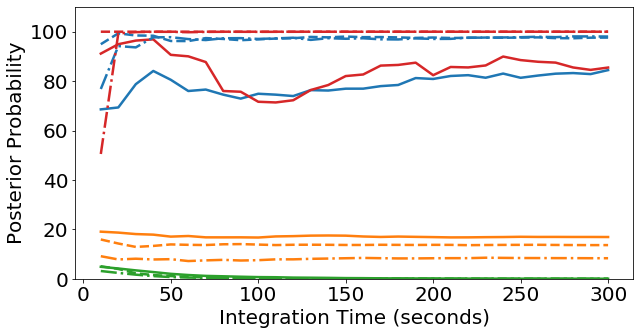

In [42]:
setting = 'full'
isotope = 'ba133'
gadras_isotope = '133BA'

for shielding_material in ['aluminum']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)

## Co60

(0, 1500)

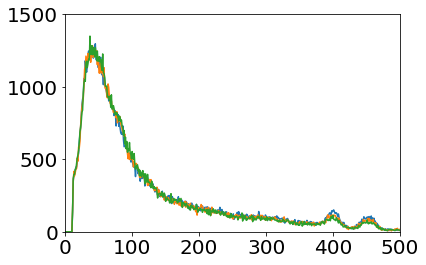

In [43]:
setting = 'easy'
isotope = 'co60'
shielding_material = 'iron'


for shielding_string in ['light', 'medium', 'heavy']:
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][-1])
# plt.semilogy()
plt.xlim(0,500)
plt.ylim(0,1500)

### easy

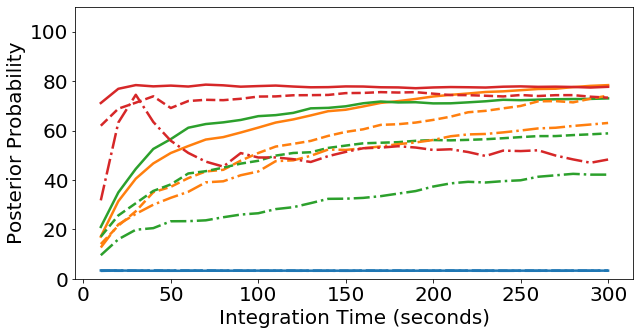

In [44]:
setting = 'easy'
isotope = 'co60'
gadras_isotope = '60CO'

for shielding_material in ['iron']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)

### full

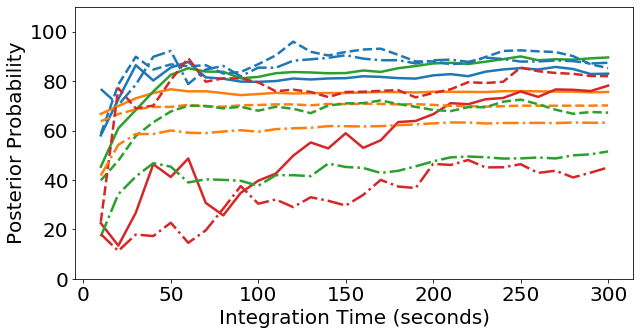

In [45]:
setting = 'full'
isotope = 'co60'
gadras_isotope = '60CO'

for shielding_material in ['iron']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)

## Cs137

(0, 1500)

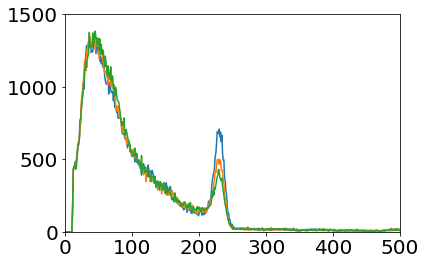

In [46]:
setting = 'easy'
isotope = 'cs137'
shielding_material = 'iron'


for shielding_string in ['light', 'medium', 'heavy']:
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][-1])
# plt.semilogy()
plt.xlim(0,500)
plt.ylim(0,1500)

### easy

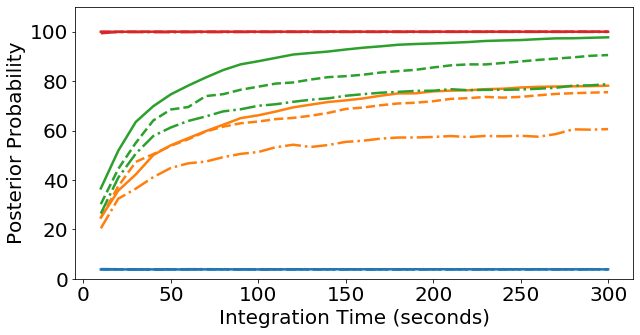

In [47]:
setting = 'easy'
isotope = 'cs137'
gadras_isotope = '137CS'

for shielding_material in ['iron']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)

### full

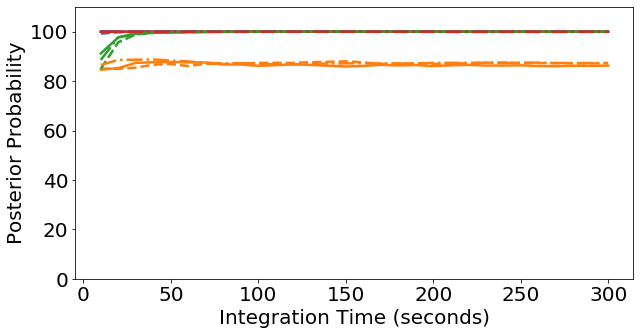

In [48]:
setting = 'full'
isotope = 'cs137'
gadras_isotope = '137CS'

for shielding_material in ['iron']:

    plot_measured_source_shielded_results(results_dataframe=results_dataframe,
                                      isotope=isotope,
                                      gadras_isotope=gadras_isotope,
                                      shielding_material=shielding_material,
                                      shielding_strings=['light', 'medium', 'heavy'],
                                      setting=setting,)
if save_fig:
    plt.savefig('iron-'+isotope+'-'+setting)